### Dataset Evaluations
=================
1. SMS Spam Collection Dataset (Baseline)
2. Amazon Reviews Dataset
3. Twitter Sentiment Analysis Dataset
4. Custom dataset 

THe classifer.py was designed to identify text that qualifes as coherent dialog. Although there are identifiers within the text that can confirm dialog, it's difficuilt to identify and confirm coherence. The lack of a single identifer for coherence results in some bias because it will need to be manually evaluated. The approach for this is to assess the comment to provide some element of what we call critical continutity. The performance evaluations below will score each model and dataset using precision (false positives) and F1 score which wwill consider the performance of the classifier.py in ide

### Model Evaluations
=================
1. Naive Bayes (Baseline)
2. Decision Tree
3. KNN
4. Attention filtering

In [57]:
from srcs.classifier.classifier import load_and_process_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import pandas as pd
import pyarrow.parquet as pq
import torch
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

data_dict, max_length = load_and_process_data('./data/datasets/baselines/4chan/splits')
train_data = np.stack(data_dict['train']['vector'].values)
val_data = np.stack(data_dict['val']['vector'].values)
test_data = np.stack(data_dict['test']['vector'].values)
train_labels = data_dict['train']['spam_label'].values
val_labels = data_dict['val']['spam_label'].values
test_labels = data_dict['test']['spam_label'].values

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder and transform the labels
train_labels = encoder.fit_transform(train_labels)
val_labels = encoder.transform(val_labels)
test_labels = encoder.transform(test_labels)

# Train and evaluate Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(train_data, train_labels)
nb_train_acc = accuracy_score(train_labels, nb_model.predict(train_data))
nb_val_acc = accuracy_score(val_labels, nb_model.predict(val_data))
nb_test_acc = accuracy_score(test_labels, nb_model.predict(test_data))

# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(train_data, train_labels)
dt_train_acc = accuracy_score(train_labels, dt_model.predict(train_data))
dt_val_acc = accuracy_score(val_labels, dt_model.predict(val_data))
dt_test_acc = accuracy_score(test_labels, dt_model.predict(test_data))

# Train and evaluate SVM
svm_model = SVC(kernel='linear')
svm_model.fit(train_data, train_labels)
svm_train_acc = accuracy_score(train_labels, svm_model.predict(train_data))
svm_val_acc = accuracy_score(val_labels, svm_model.predict(val_data))
svm_test_acc = accuracy_score(test_labels, svm_model.predict(test_data))

# Load deep learning model
best_model_path = 'saved_models/best_model.tf'
best_model = tf.keras.models.load_model(best_model_path)

# Predict and calculate accuracy
train_predictions = best_model.predict(train_data)
train_predictions = np.argmax(train_predictions, axis=1)
best_train_acc = accuracy_score(train_labels, train_predictions)
val_predictions = best_model.predict(val_data)
val_predictions = np.argmax(val_predictions, axis=1)
best_val_acc = accuracy_score(val_labels, val_predictions)
test_predictions = best_model.predict(test_data)
test_predictions = np.argmax(test_predictions, axis=1)
best_test_acc = accuracy_score(test_labels, test_predictions)

# Predict and calculate accuracy
# Load deep learning model
student_model_path = 'saved_models/student_model_4.tf'
student_model = tf.keras.models.load_model(student_model_path)
train_predictions = student_model.predict(train_data)
train_predictions = np.argmax(train_predictions, axis=1)
student_train_acc = accuracy_score(train_labels, train_predictions)
val_predictions = student_model.predict(val_data)
val_predictions = np.argmax(val_predictions, axis=1)
student_val_acc = accuracy_score(val_labels, val_predictions)
test_predictions = student_model.predict(test_data)
test_predictions = np.argmax(test_predictions, axis=1)
student_test_acc = accuracy_score(test_labels, test_predictions)

2/2 [==============================] - 0s 3ms/step


In [58]:
# Naive Bayes
nb_train_f1 = f1_score(train_labels, nb_model.predict(train_data))
nb_val_f1 = f1_score(val_labels, nb_model.predict(val_data))
nb_test_f1 = f1_score(test_labels, nb_model.predict(test_data))
nb_train_auc = roc_auc_score(train_labels, nb_model.predict_proba(train_data)[:,1])
nb_val_auc = roc_auc_score(val_labels, nb_model.predict_proba(val_data)[:,1])
nb_test_auc = roc_auc_score(test_labels, nb_model.predict_proba(test_data)[:,1])

# Decision Tree
dt_train_f1 = f1_score(train_labels, dt_model.predict(train_data))
dt_val_f1 = f1_score(val_labels, dt_model.predict(val_data))
dt_test_f1 = f1_score(test_labels, dt_model.predict(test_data))
dt_train_auc = roc_auc_score(train_labels, dt_model.predict_proba(train_data)[:,1])
dt_val_auc = roc_auc_score(val_labels, dt_model.predict_proba(val_data)[:,1])
dt_test_auc = roc_auc_score(test_labels, dt_model.predict_proba(test_data)[:,1])

# SVM 
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(train_data, train_labels)
svm_train_f1 = f1_score(train_labels, svm_model.predict(train_data))
svm_val_f1 = f1_score(val_labels, svm_model.predict(val_data))
svm_test_f1 = f1_score(test_labels, svm_model.predict(test_data))
svm_train_auc = roc_auc_score(train_labels, svm_model.predict_proba(train_data)[:,1])
svm_val_auc = roc_auc_score(val_labels, svm_model.predict_proba(val_data)[:,1])
svm_test_auc = roc_auc_score(test_labels, svm_model.predict_proba(test_data)[:,1])

# Deep Learning Model 
train_predictions_prob = best_model.predict(train_data).flatten()
val_predictions_prob = best_model.predict(val_data).flatten()
test_predictions_prob = best_model.predict(test_data).flatten()

best_train_f1 = f1_score(train_labels, train_predictions)
best_val_f1 = f1_score(val_labels, val_predictions)
best_test_f1 = f1_score(test_labels, test_predictions)

best_train_auc = roc_auc_score(train_labels, train_predictions_prob)
best_val_auc = roc_auc_score(val_labels, val_predictions_prob)
best_test_auc = roc_auc_score(test_labels, test_predictions_prob)

# Deep Learning Model w/ UST
train_predictions_prob_ust = student_model.predict(train_data).flatten()
val_predictions_prob_ust = student_model.predict(val_data).flatten()
test_predictions_prob_ust = student_model.predict(test_data).flatten()

ust_train_f1 = f1_score(train_labels, train_predictions)
ust_val_f1 = f1_score(val_labels, val_predictions)
ust_test_f1 = f1_score(test_labels, test_predictions)

ust_train_auc = roc_auc_score(train_labels, train_predictions_prob_ust)
ust_val_auc = roc_auc_score(val_labels, val_predictions_prob_ust)
ust_test_auc = roc_auc_score(test_labels, test_predictions_prob_ust)

# Combine all the F1-scores and AUCs
f1_scores_train = [nb_train_f1,svm_train_f1,dt_train_f1,best_train_f1,ust_train_f1]
f1_scores_val = [nb_val_f1, svm_val_f1,dt_val_f1,best_val_f1,ust_val_f1]
f1_scores_test = [nb_test_f1, svm_test_f1,dt_test_f1,best_test_f1,ust_test_f1]
auc_scores_train = [nb_train_auc, svm_train_auc,dt_train_auc, ust_train_auc]
auc_scores_val = [nb_val_auc, svm_val_auc,dt_val_auc, ust_val_auc]
auc_scores_test = [nb_test_auc, svm_test_auc,dt_test_auc, ust_test_auc]

# Creating a dictionary for ROC AUC scores for each model
roc_auc_scores = {
    'Naive Bayes': {'train': nb_train_auc, 'val': nb_val_auc, 'test': nb_test_auc},
    'Decision Tree': {'train': dt_train_auc, 'val': dt_val_auc, 'test': dt_test_auc},
    'SVM': {'train': svm_train_auc, 'val': svm_val_auc, 'test': svm_test_auc},
    'Deep Learning': {'train': best_train_auc, 'val': best_val_auc, 'test': best_test_auc},
    'Deep Learning w/ UST': {'train': ust_train_auc, 'val': ust_val_auc, 'test': ust_test_auc}
}

models = ['Naive Bayes','SVM','Decision Tree','Deep Learning','Deep Learning w/ UST']
train_scores = [nb_train_acc, svm_train_acc, dt_train_acc,best_train_acc,student_train_acc]  
val_scores = [nb_val_acc, svm_val_acc, dt_val_acc,best_val_acc,student_val_acc]  
test_scores = [nb_test_acc, svm_test_acc, dt_test_acc,best_test_acc,student_test_acc]

2/2 [==============================] - 0s 4ms/step


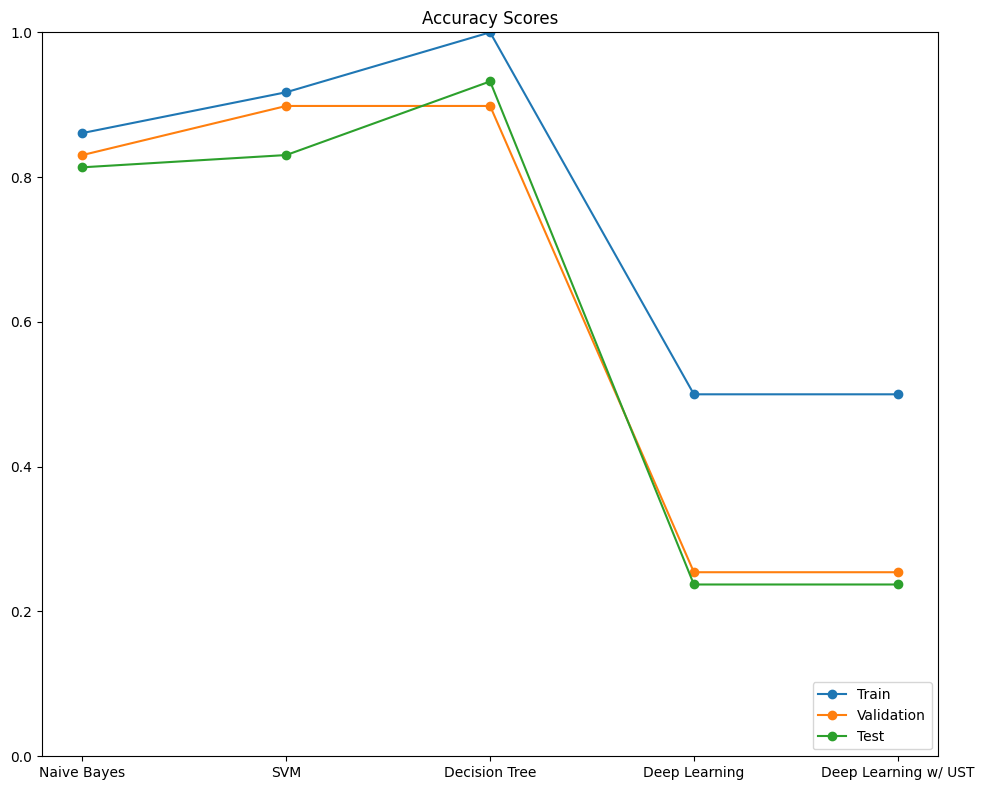

In [59]:
def plot_accuracy(train_acc, val_acc, test_acc, models):
    fig, ax = plt.subplots(figsize=(10, 8))
    x = np.arange(len(models))
    ax.plot(x, train_acc, marker='o', label='Train')
    ax.plot(x, val_acc, marker='o', label='Validation')
    ax.plot(x, test_acc, marker='o', label='Test')
    plt.xticks(x, models)
    ax.set_title('Accuracy Scores')
    ax.set_ylim(0, 1)
    ax.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

# Example usage:
plot_accuracy(train_scores, val_scores, test_scores, models)


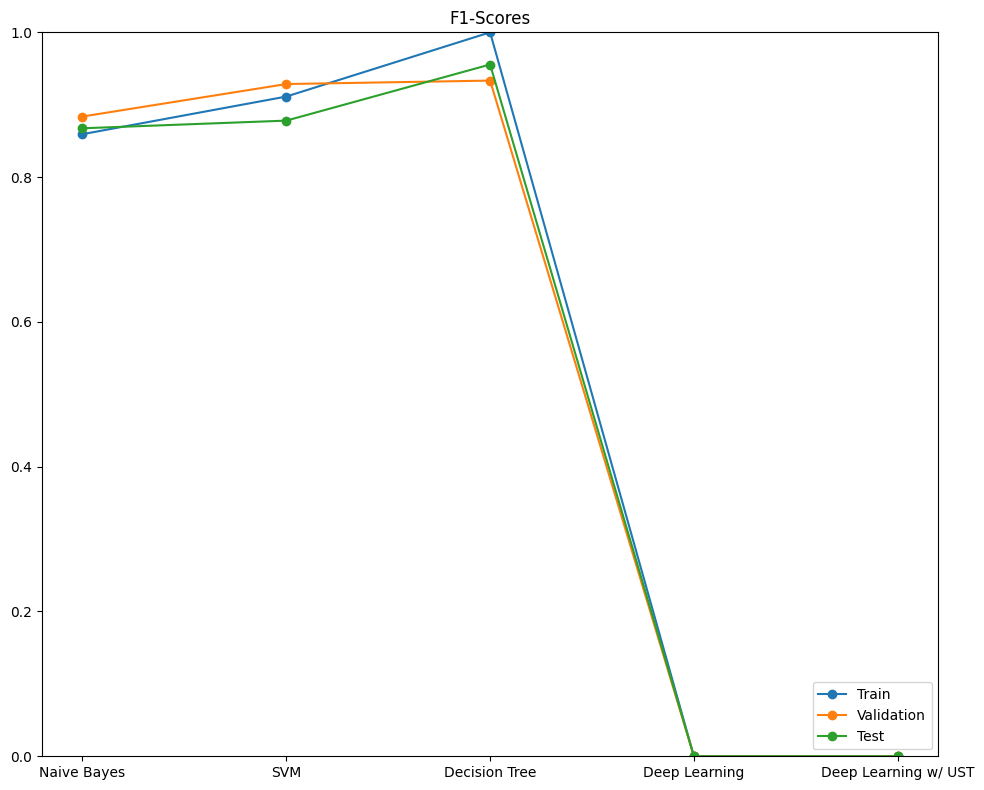

In [60]:
def plot_f1(train_f1, val_f1, test_f1, models):
    fig, ax = plt.subplots(figsize=(10, 8))
    x = np.arange(len(models))
    ax.plot(x, train_f1, marker='o', label='Train')
    ax.plot(x, val_f1, marker='o', label='Validation')
    ax.plot(x, test_f1, marker='o', label='Test')
    plt.xticks(x, models)
    ax.set_title('F1-Scores')
    ax.set_ylim(0, 1)
    ax.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
plot_f1(f1_scores_train, f1_scores_val, f1_scores_test, models)

2/2 [==============================] - 0s 9ms/step


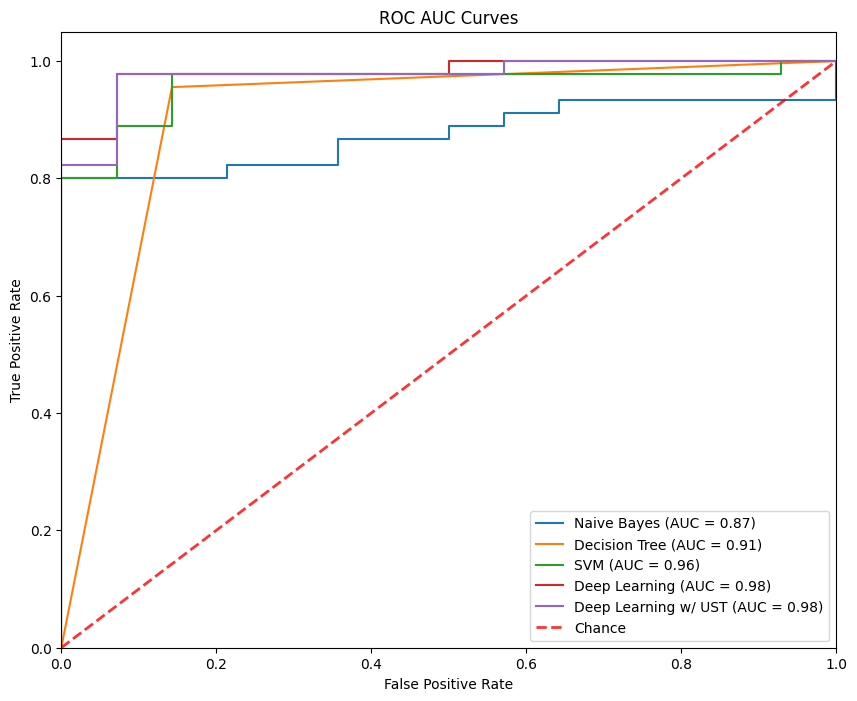

In [61]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

def plot_roc_auc_curve(true_labels, model_predictions, model_names):
    plt.figure(figsize=(10, 8))
    
    for pred_probabilities, title in zip(model_predictions, model_names):
        fpr, tpr, _ = roc_curve(true_labels, pred_probabilities)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (title, roc_auc))

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curves')
    plt.legend(loc="lower right")
    plt.show()

model_predictions = [
    nb_model.predict_proba(test_data)[:,1],
    dt_model.predict_proba(test_data)[:,1],
    svm_model.predict_proba(test_data)[:,1],
    best_model.predict(test_data).flatten(),
    student_model.predict(test_data).flatten()
]

model_names = ['Naive Bayes', 'Decision Tree', 'SVM', 'Deep Learning', 'Deep Learning w/ UST']
plot_roc_auc_curve(test_labels, model_predictions, model_names)